In [1]:
#importanto bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

#librerías modelos de ciencia de datos
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [96]:
#Lectura de datos en python

datos = pd.read_csv("datasetsinnan.csv")

In [97]:
datos.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [98]:
datos = datos.drop(['Name', 'Ticket', 'Cabin','Embarked','Sex'], axis=1)

In [99]:
#descripción de los datos
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,455.495050,0.663366,1.198020,35.112392,0.445545,0.440594,76.103301
std,249.704228,0.473732,0.528205,14.988475,0.630490,0.732294,74.759941
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.250000,0.000000,1.000000,25.000000,0.000000,0.000000,28.959375
50%,457.500000,1.000000,1.000000,33.500000,0.000000,0.000000,55.000000
75%,681.500000,1.000000,1.000000,46.750000,1.000000,1.000000,89.776050
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


Text(0.5, 1.0, 'identificación de datos fatantes y atipicos')

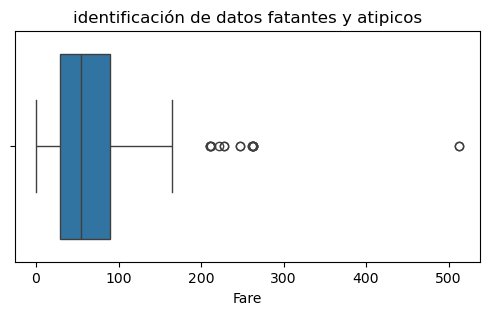

In [100]:
#identificación datos faltantes y atipicos

plt.figure(figsize=(6,3))
sns.boxplot(x=datos["Fare"])
plt.title("identificación de datos fatantes y atipicos")


Text(0.5, 1.0, 'identificación de datos fatantes y atipicos')

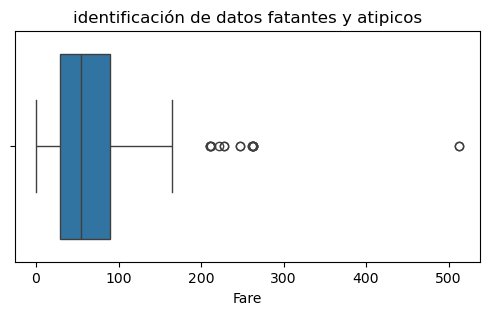

In [101]:
plt.figure(figsize=(6,3))
sns.boxplot(x=datos["Fare"])
plt.title("identificación de datos fatantes y atipicos")


In [102]:
#procesar los datos limpiándolos segun sea necesario

print("cantidad de registro en Factura", datos["Fare"].isin([0]).sum())

print("cantidad de registro en edad", datos["Age"].isin([0]).sum())


cantidad de registro en Factura 3
cantidad de registro en edad 0


In [103]:

#Conteo datos atipicos


nivel_minimo =0
nivel_maximo =500

total_atipicos = ((datos ["Fare"]<nivel_minimo) | (datos["Fare"]>nivel_maximo)).sum()
print("el total de datos atipicos es ",format(total_atipicos))


el total de datos atipicos es  2


In [104]:
#filtrar datos atipicos

datos = datos[(datos["Fare"]<nivel_maximo)&(datos["Fare"]>nivel_minimo)]



In [105]:
#validar si se r3movieron los datos atipicos

total_atipicos = ((datos["Fare"]<nivel_minimo) | (datos["Fare"]>nivel_maximo)).sum()

print("el total de datos atipicos es ",format(total_atipicos))





el total de datos atipicos es  0


In [106]:
#tipo de datos y datos faltantes
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 201
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  197 non-null    int64  
 1   Survived     197 non-null    int64  
 2   Pclass       197 non-null    int64  
 3   Age          197 non-null    float64
 4   SibSp        197 non-null    int64  
 5   Parch        197 non-null    int64  
 6   Fare         197 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 12.3 KB


In [107]:
#total se personas que sobrevivieron

datos["Survived"].value_counts()



Survived
1    132
0     65
Name: count, dtype: int64

In [108]:
datos["Survived"].head(20)

0     1
1     1
2     0
3     1
4     1
5     1
6     1
7     0
8     1
9     1
10    0
11    1
12    0
13    1
14    0
15    1
16    0
17    0
18    1
19    0
Name: Survived, dtype: int64

In [109]:
#dividir el dataset en train y en test para evaluar correctamente

#se crean variables x,y para evaluar la info del entrenamiento

X = datos.drop("Survived", axis= 1) #se cargan los datos sin la columna de condition

Y= datos["Survived"] #datos de train con datos de columna condition

#La funcion train_test_split c43a una division ennjn vknjunto de datos en dos bloques, uno entrenamiento y otro de prueba

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

print(X_train)

     PassengerId  Pclass   Age  SibSp  Parch      Fare
127          572       1  53.0      2      0   51.4792
61           300       1  50.0      0      1  247.5208
14            76       3  25.0      0      0    7.6500
36           194       2   3.0      1      1   26.0000
145          648       1  56.0      0      0   35.5000
..           ...     ...   ...    ...    ...       ...
5             22       2  34.0      0      0   13.0000
74           333       1  38.0      0      1  153.4625
86           378       1  27.0      0      2  211.5000
65           310       1  30.0      0      0   56.9292
71           328       2  36.0      0      0   13.0000

[147 rows x 6 columns]


In [110]:
#construir modelo rgreesuon logistca

modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit(X_train, Y_train)

#crea modelo de prediccion
prediccion = modelo_regresion.predict(X_test) #la funcion predict predice los valores a partir del conjunto de datos de validacion


In [40]:
print(Y_test)

112    0
250    1
240    1
211    1
285    0
      ..
172    0
136    1
138    0
201    1
258    1
Name: condition, Length: 74, dtype: int64


In [111]:
print(prediccion)

[1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0]


In [112]:
#desempeño modelo de regresiom

print(classification_report(Y_test, prediccion))

              precision    recall  f1-score   support

           0       0.60      0.38      0.46        16
           1       0.75      0.88      0.81        34

    accuracy                           0.72        50
   macro avg       0.68      0.63      0.64        50
weighted avg       0.70      0.72      0.70        50



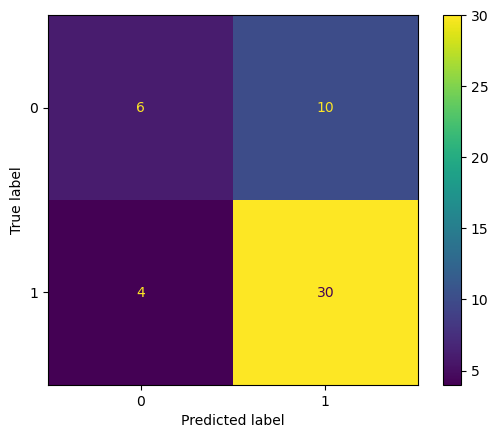

In [113]:
#matriz de confusion del modelo

cm =confusion_matrix(Y_test, prediccion)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

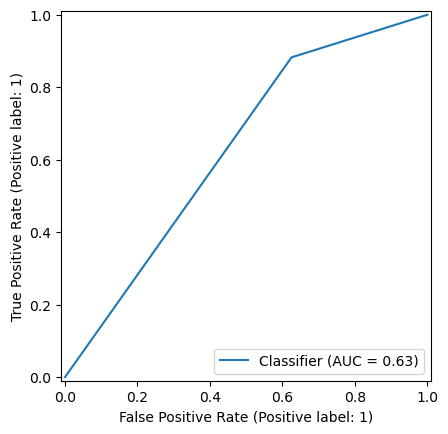

In [114]:
#curva presicion del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, prediccion)

plt.show()